In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import warnings
import os

In [2]:
def rescaler(img, scale=0.5):
    w, h = int(img.shape[1] * scale), int(img.shape[0] * scale)
    dim = (w , h)
    return cv.resize(img, dim, interpolation=cv.INTER_AREA)


In [3]:
live = cv.VideoCapture(0)
live.set(3, 1250)
live.set(4, 750)

while True:
    isTrue, frame = live.read()
    cv.imshow("live Video", frame)

    if cv.waitKey(20) & 0xFF==ord('q'):
        break

live.release()
cv.destroyAllWindows()

In [4]:
image = cv.imread("./index.jpeg")


warp_affine = cv.warpAffine(image, np.float32([[1,0, 90], [0,1, 20]]), (image.shape[1], image.shape[0]))
flipped = cv.flip(image, 1)
resize = cv.resize(image, (900, 700), interpolation=cv.INTER_LINEAR)

cv.imshow("Original Image",image)
cv.imshow("Resized Image",resize)
cv.imshow("shifted Image",warp_affine)
cv.imshow("Flipped Image",flipped)
cv.waitKey()
cv.destroyAllWindows()


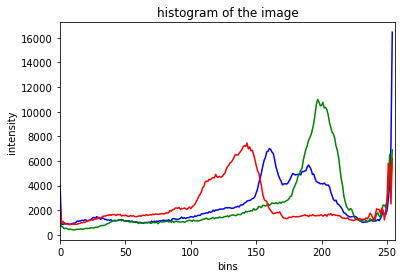

In [5]:
image  = cv.imread("./peets.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blank = np.zeros(gray.shape[:2], dtype="uint8")

circle = cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 200, 255, -1, 2)
mask = cv.bitwise_and(gray, gray, mask= circle)
# cv.imshow("Mask image", mask)
hist = cv.calcHist([gray], [0], mask, [456], [0, 256])

colors = ["b", "g", "r"]

for i, c in enumerate(colors):
    histo = cv.calcHist([image], [i], None, [255], [0, 256])
    plt.plot(histo, color=c)
    plt.xlim([0, 256])

# plt.plot(hist)
plt.title("histogram of the image")
plt.xlabel("bins")
plt.ylabel("intensity")
# plt.tight_layout()
plt.show()

# cv.imshow("Original Image", image)
cv.waitKey()
cv.destroyAllWindows()

In [6]:
image = cv.imread("./index.jpeg")

gray =  cv.cvtColor(image, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(gray, (3,3), cv.BORDER_DEFAULT)

edge = cv.Canny(blur, 180 ,170)

dilated = cv.dilate(edge, (7, 9), iterations=4)
eroded = cv.erode(dilated, (7, 2), iterations=1)

cv.imshow("Original Image",image)
cv.imshow("Gray Image",gray)
cv.imshow("BLur Image",blur)
cv.imshow("edges Image",edge)
cv.imshow("dilate Image", dilated)
cv.imshow("eroded Image", eroded)
cv.waitKey()
cv.destroyAllWindows()

# Threshold party

In [7]:
image = cv.imread("./cats_2.jpg")
image = cv.resize(image, (500, 500))
gray = cv.cvtColor(image , cv.COLOR_BGR2GRAY)

threshold, thresh_im = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
threshold, thresh_im_inv  = cv.threshold(thresh_im, 150, 255, cv.THRESH_BINARY_INV)

# Adaptive Threshold 

adaptive = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 7, 2)

cv.imshow("Threshold Image ",thresh_im_inv)
cv.imshow("Adaptive thresh ",adaptive)
cv.waitKey()
cv.destroyAllWindows() 


# Edges detector and drawer

In [8]:
image = cv.imread("./pet.jpg")
image = cv.resize(image, (350, 300))
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow("Gray Image", gray)

lab = cv.Laplacian(gray, cv.CV_16S)
lab =  np.uint8(np.absolute(lab))


sobelx = cv.Sobel(gray, cv.CV_64F, 0, 1)
sobely = cv.Sobel(gray, cv.CV_64F, 1, 0)

canny = cv.Canny(gray, 120, 150)

cv.imshow("laplacian image", lab)
cv.imshow("Sobel X image", sobelx)
cv.imshow("Sobel Y image", sobely)
cv.imshow("Canny Image", canny)
cv.waitKey()
cv.destroyAllWindows()

In [10]:
HAAR_FACE = cv.CascadeClassifier("./haar_faces.xml")
chris = cv.imread("./cat.jpg")
chris = cv.resize(chris, (900, 700))
gray = cv.cvtColor(chris, cv.COLOR_BGR2GRAY)
# cv.imshow("Person Original Image", chris)
# cv.imshow("Person Gray Image", gray)

faces_rect = HAAR_FACE.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=2)

for (x,y, w, h) in faces_rect:
    cv.rectangle(chris, (x, y), (x+w, y+h), (29, 90, 250), thickness = 2)


cv.imshow("Detected Faces", chris)

print(len(faces_rect))
cv.waitKey()
cv.destroyAllWindows()

2


In [11]:
live = cv.VideoCapture(0)
live.set(3, 950)
live.set(4, 750)
HAAR_FACE = cv.CascadeClassifier("./data/haarcascade_frontalface_alt2.xml")


while True:
    isTrue, frame = live.read()
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frames = HAAR_FACE.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=2)
    for (x,y, w, h) in frames:
        cv.rectangle(frame, (x, y), (x+w, y+h), (29, 90, 250), thickness = 2)
        roi = gray[y:h+y, x:x+w]
        roi_c = frame[y:h+y, x:x+w]
        cv.imwrite("./chris_face.png", roi)
        cv.imwrite("./chris_face_colored.png", roi_c)

    cv.imshow("live Video detected faces ", frame)
    if cv.waitKey(20) & 0xFF==ord('q'):
        break

live.release()
cv.destroyAllWindows()

In [12]:
path = "./persons"

X_train = []
y_train = []
HAAR_FACE = cv.CascadeClassifier("./data/haarcascade_frontalface_alt2.xml")


peoples= ['TonyStark', 'chrisKid', 'elonMusk']

for person in peoples:
    path = os.path.join("./persons", person)
    labels  = peoples.index(person)
    for image in os.listdir(path):
        img = os.path.join(path, image)
        img_array = cv.imread(img)
        gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
        face = HAAR_FACE.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=2)
        for x, y, w, h in face :
            cv.rectangle(face, (x, y), (x+w, y+h), (29, 90, 250), thickness = 2)
            roi = gray[y:h+y, x:x+w]
            X_train.append(roi)
            y_train.append(labels)

print("l of features", len(X_train)) 
print("l of labels", len(y_train)) 

l of features 82
l of labels 82


In [13]:
warnings.filterwarnings("ignore")

features = np.array(X_train, dtype="object")
labels = np.array(y_train)
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.train(features, labels)

face_recognizer.save("recognizer.yml")

np.save("features.npy", X_train)
np.save("label.npy", y_train)

# Face recognation

In [ ]:

# features, labels = np.load("features.npy"), np.load("label.npy")
HAAR_FACE = cv.CascadeClassifier("./data/haarcascade_frontalface_alt2.xml")

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read("recognizer.yml")

val_img = "./persons/chrisVal/IMG_20210301_091205_365.jpg"


peoples= ['TonyStark', 'chrisKid', 'elonMusk']
image = cv.imread(val_img)
image = cv.resize(image, (550, 400))
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv.imshow("Validation person", gray)


face = HAAR_FACE.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=2)
for x, y, w, h in face:
    roi = gray[y:h+y, x:x+w]
    label, confidence = face_recognizer.predict(roi)
    cv.putText(image, "chris", (5,5), cv.FONT_HERSHEY_SCRIPT_COMPLEX, 1.0, (255,0, 1), 1)
    cv.rectangle(image, (x, y), (x+w, y+h), (29, 90, 250), thickness = 2)

    print(f"Person : {peoples[label]}---> {confidence}")

cv.imshow("detected face", image)
cv.waitKey()
cv.destroyAllWindows()